# 2 Exploratory Data Analysis  <a id="eda"></a>

<a id="contents"></a>
## 2.1 Table of Contents

- [2 Exploratory Data Analysis](#eda)
    - [2.1 Contents](#contents)
    - [2.2 Introduction](#introduction)
    - [2.3 Imports](#imports)
    - [2.4 Explore the Data](#explore_data)

## 2.2 Introduction <a id="imports"></a>

The goal of this data science project is to develop a machine learning model capable of predicting stock prices for a selected set of publicly traded companies. By leveraging historical stock market data, along with relevant features such as financial indicators, market sentiment, and news headlines, the model aims to forecast future stock prices with a high degree of accuracy. The prediction of stock prices is of paramount importance to investors, traders, and financial institutions seeking to make informed decisions about buying, selling, or holding stocks. The developed model will provide valuable insights and actionable predictions that can potentially lead to improved investment strategies and better risk management in the dynamic and volatile stock market environment.

### Objective: 
Our aim is to examine the relationship between various stock prediction variables and past stock performance for 15 beauty and wellness stocks. We'll leverage visualizations to identify potential outliers and feature correlations, as well as generate statistical summaries, the nature of distributions for each variable, and how we might handle any data cleaning or transformation that's necessary. 

## 2.3 Imports <a id="imports"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import csv
from tqdm.notebook import tqdm
from datetime import datetime, timezone

## 2.4 Explore the Data <a id="explore_data"></a>

In [2]:
df = pd.read_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Capstone/archive/Concated_Dataframe.csv')

In [3]:
columns_to_keep = ['Date','Close','stock_symbol']
df_1 = df[columns_to_keep]
df_1

,Date,Close,stock_symbol
0,1988-02-04 00:00:00-05:00,0.398479,IPAR
1,1988-02-05 00:00:00-05:00,0.398479,IPAR
2,1988-02-08 00:00:00-05:00,0.398479,IPAR
3,1988-02-09 00:00:00-05:00,0.398479,IPAR
4,1988-02-10 00:00:00-05:00,0.398479,IPAR
...,...,...,...
107696,2024-03-22 00:00:00-04:00,83.080002,IFF
107697,2024-03-25 00:00:00-04:00,82.010002,IFF
107698,2024-03-26 00:00:00-04:00,81.440002,IFF
107699,2024-03-27 00:00:00-04:00,85.639999,IFF


In [4]:
df_1.info()
df_1['stock_symbol'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107701 entries, 0 to 107700
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          107701 non-null  object 
 1   Close         107701 non-null  float64
 2   stock_symbol  107701 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.5+ MB


stock_symbol
PG      15667
CL      12839
IFF     12427
HELE    12034
SPB     11407
UL      11096
IPAR     9108
EL       7138
CUTR     5033
ULTA     4134
COTY     2717
ELF      1891
HIMS     1143
SKIN      840
KVUE      227
Name: count, dtype: int64

In [5]:
df_1.shape

(107701, 3)

**Observations**:

* The dataset includes an identifier (stock_symbol)and numerical variables (Date, Open, High, Low, Close, Colume, Dividends, and Stock Splits).
* There are no columns/rows with null values which indicated that there are no missing data in any records.

In [6]:
df_close = df_1.reset_index()['Close']

In [7]:
df_close

0          0.398479
1          0.398479
2          0.398479
3          0.398479
4          0.398479
            ...    
107696    83.080002
107697    82.010002
107698    81.440002
107699    85.639999
107700    85.989998
Name: Close, Length: 107701, dtype: float64

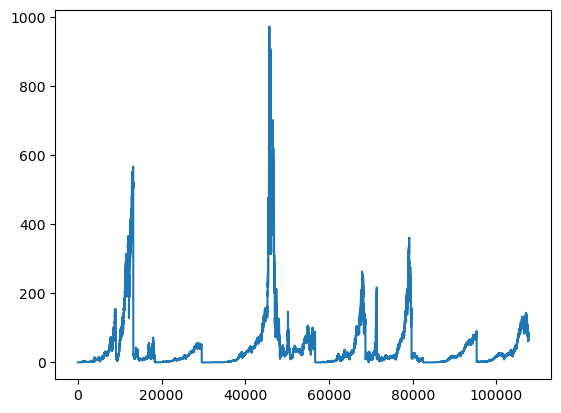

In [8]:
plt.plot(df_close)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [10]:
df_close

array([[0.00036715],
       [0.00036715],
       [0.00036715],
       ...,
       [0.08375724],
       [0.08807895],
       [0.08843909]])

In [18]:
# Group by stock symbol and calculate summary statistics for the 'Close' column
summary_close = df_1.groupby('stock_symbol')['Close'].describe()

# Sort the summary statistics by the mean value of the 'Close' column
summary_close_sorted = summary_close.sort_values(by='mean', ascending=False)

# Display the summary statistics
print(summary_close_sorted)

                count        mean         std        min        25%  \
stock_symbol                                                          
ULTA           4134.0  191.978151  145.238716   4.242528  69.284744   
SPB           11407.0  118.187635  173.315683   8.931292  32.113674   
EL             7138.0   69.444214   80.604213   6.062683  14.982805   
ELF            1891.0   37.899498   38.714920   7.300000  17.685000   
HELE          12034.0   35.161673   53.998500   0.041667   1.645833   
IFF           12427.0   34.880562   38.272897   1.625727   5.771370   
PG            15667.0   26.350136   37.755102   0.166901   0.708815   
KVUE            227.0   21.622536    2.295107  17.837791  19.697896   
CL            12839.0   20.998700   24.570162   0.205977   0.840381   
IPAR           9108.0   20.466519   29.988384   0.115116   1.965831   
CUTR           5033.0   19.189708   12.830303   1.390000   9.480000   
UL            11096.0   16.145988   16.550913   0.336823   2.865972   
COTY  

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107701 entries, 0 to 107700
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          107701 non-null  object 
 1   Close         107701 non-null  float64
 2   stock_symbol  107701 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.5+ MB


In [13]:
df_1['stock_symbol'].unique()

array(['IPAR', 'ULTA', 'KVUE', 'CUTR', 'UL', 'PG', 'SPB', 'HELE', 'SKIN',
       'ELF', 'HIMS', 'EL', 'COTY', 'CL', 'IFF'], dtype=object)

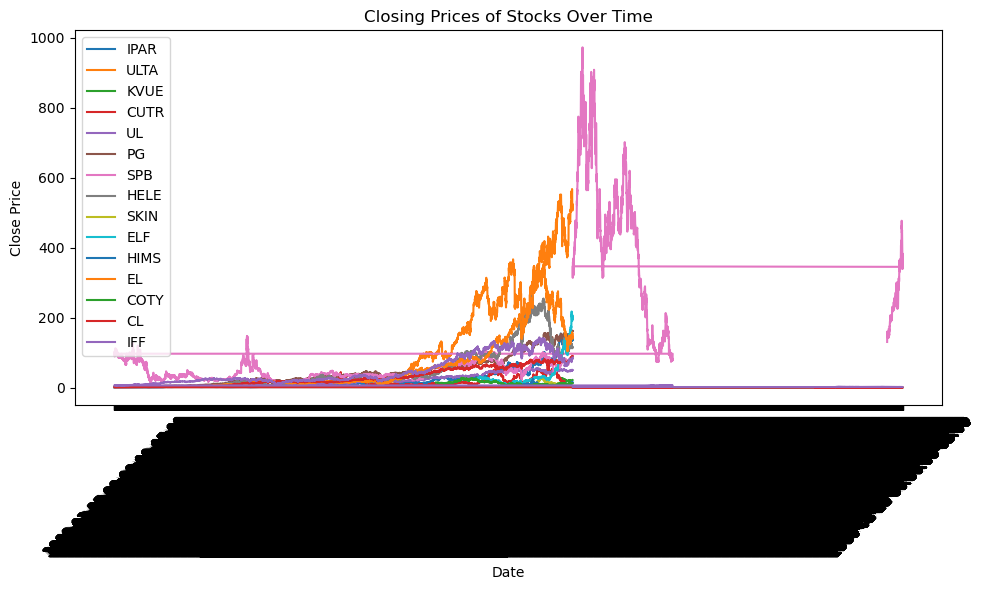

In [14]:
plt.figure(figsize=(10, 6))
for symbol in df_1['stock_symbol'].unique():
    stock_data = df_1[df_1['stock_symbol'] == symbol]
    plt.plot(stock_data['Date'], stock_data['Close'], label=symbol)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices of Stocks Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

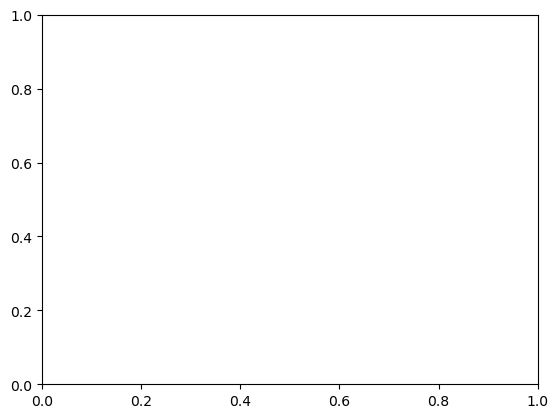

In [15]:
plt.plot(df_1)
plt.show()